<a href="https://colab.research.google.com/github/Anshit2723/DataScience_projects/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np




In [ ]:
df=pd.read_csv("studentperformance.csv")
df.drop(["address"],axis=1,inplace=True)
df.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.isnull().sum()

,0
school,0
sex,0
age,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0
reason,0


In [ ]:
df.dtypes

,0
school,object
sex,object
age,int64
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object
reason,object


In [ ]:
categorical_cols=df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
df_encoded=pd.get_dummies(df,columns=categorical_cols)

In [ ]:
df_encoded

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,False,True,True,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,True,False,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,False,True,False,True,False,True,True,False,True,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,True,False,False,True,False,True,True,False


In [ ]:
numerical_cols=df.select_dtypes(include=['int64']).columns.tolist()
numerical_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_scaled=df_encoded.copy()

df_scaled[numerical_cols]=scaler.fit_transform(df_scaled[numerical_cols])
df_scaled[numerical_cols].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.428571,1.00,1.00,0.333333,0.333333,0.0,0.75,0.50,0.75,0.00,0.00,0.5,0.1250,0.000000,0.578947,0.578947
1,0.285714,0.25,0.25,0.000000,0.333333,0.0,1.00,0.50,0.50,0.00,0.00,0.5,0.0625,0.473684,0.578947,0.578947
2,0.000000,0.25,0.25,0.000000,0.333333,0.0,0.75,0.50,0.25,0.25,0.50,0.5,0.1875,0.631579,0.684211,0.631579
3,0.000000,1.00,0.50,0.000000,0.666667,0.0,0.50,0.25,0.25,0.00,0.00,1.0,0.0000,0.736842,0.736842,0.736842
4,0.142857,0.75,0.75,0.000000,0.333333,0.0,0.75,0.50,0.25,0.00,0.25,1.0,0.0000,0.578947,0.684211,0.684211


In [ ]:
# Creating an average grade feature
df_scaled['average_grade'] = (df_scaled['G1'] + df_scaled['G2'] + df_scaled['G3']) / 3

# Creating a parental education level feature
df_scaled['parental_education'] = df_scaled['Medu'] + df_scaled['Fedu']


In [ ]:
df_scaled.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,goout,Dalc,Walc,health,absences,G1,G2,G3,average_grade,parental_education
0,GP,F,1.031695,GT3,A,1.310216,1.540715,at_home,teacher,course,...,0.693785,-0.543555,-0.997695,-0.371042,0.073433,-4.155470,-0.195820,-0.280658,-1.543982,2.850931
1,GP,F,0.210137,GT3,T,-1.336039,-1.188832,at_home,other,course,...,-0.157380,-0.543555,-0.997695,-0.371042,-0.357863,-0.874570,-0.195820,-0.280658,-0.450349,-2.524872
2,GP,F,-1.432980,LE3,T,-1.336039,-1.188832,at_home,other,other,...,-1.008546,0.538553,0.560678,-0.371042,0.504730,0.219064,0.491137,0.029116,0.246439,-2.524872
3,GP,F,-1.432980,GT3,T,1.310216,-0.278983,health,services,home,...,-1.008546,-0.543555,-0.997695,1.012903,-0.789159,0.948153,0.834615,0.648663,0.810477,1.031233
4,GP,F,-0.611422,GT3,T,0.428131,0.630866,other,other,home,...,-1.008546,-0.543555,-0.218508,1.012903,-0.789159,-0.145481,0.491137,0.338889,0.228182,1.058997


In [ ]:
# Dropping irrelevant features (e.g., individual grades since we created average_grade)
df_final = df_scaled.drop(['G1', 'G2', 'G3'], axis=1)


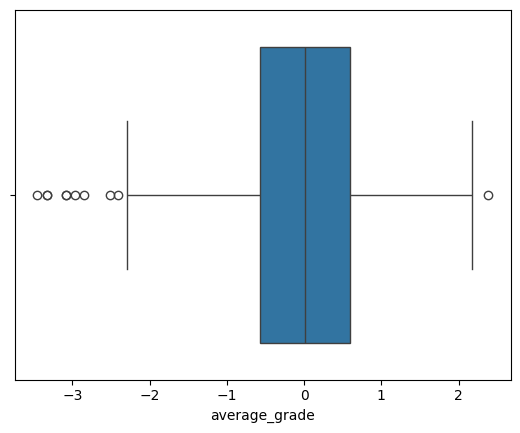

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_final['average_grade'])
plt.show()

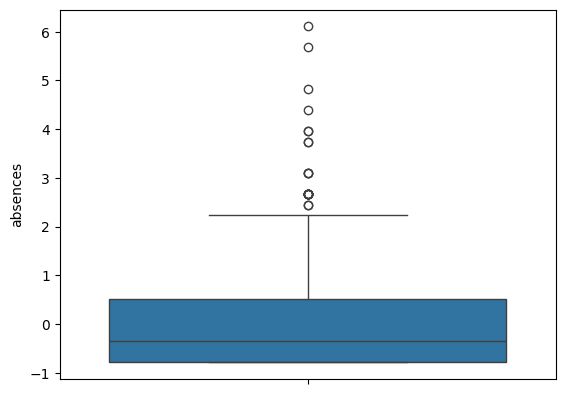

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df_final['absences'])
plt.show()